In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import truncnorm

In [4]:
data = pd.DataFrame()

In [8]:
def cuped(data,pre,post):
    cov = np.cov(data[pre],data[post])[0][1]
    var = np.var(data[pre])
    theta = cov/var
    data['cuped_'+post] = data[post]- theta*data[pre]
    var_ori = np.var(data[post])
    var_cuped = np.var(data['cuped_'+post])
    print('cuped降方差比例：',1-var_cuped/var_ori)
    return data,theta

In [76]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt
import pickle


from sklearn.metrics import r2_score

In [77]:
def itr_xgb(train,test,key,post):
    xgb_model_1 = xgb.XGBRegressor(
                max_depth = 4,
                # objective='reg:squarederror', 
                objective='reg:tweedie',
                tweedie_variance_power = 1.7,
                eval_metric = "rmse",
                booster='gbtree',
                n_estimators = 500,
                # grow_policy = 'lossguide',
                early_stopping_rounds=20,
                importance_type = 'gain',
                learning_rate = 0.05,
                min_child_weight=2,
                gamma = 0.2,
                subsample=0.5,
                colsample_bytree=0.8,
                reg_alpha=0.1,
                reg_lambda=1,
                random_state=0)
    print('build data')
    fold_feature,fold_label = build_data(train,key,post)
    print('train test split')
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(fold_feature, fold_label, test_size=0.2, random_state=0)

    print('model fitting')
    xgb_model_1.fit(X_train_1,y_train_1,eval_set=[(X_test_1, y_test_1)])
    y_hat_test = xgb_model_1.predict(X_test_1)
    y_hat_train = xgb_model_1.predict(fold_feature)
    r2_y_test = r2_score(y_test_1, y_hat_test)
    r2_y_train = r2_score(fold_label, y_hat_train)
    # r2_y_test_cat = r2_score(y_test_1, y_hat_test_cat)
    print('训练集：',r2_y_train,'预测集',r2_y_test)
    featr , lab = build_data(test,key,post)
    y_hat = xgb_model_1.predict(featr)
    train[post+'_y_hat_xgb'] = y_hat_train
    test[post+'_y_hat_xgb'] = y_hat
    test = cuped(test,post+'_y_hat_xgb',post)
    return train,test

In [78]:
def build_data(df,featurelist,post):
    fea = df.loc[:,featurelist].values
    lab = df.loc[:,post].values   # 2-fold
    
    return fea,lab

0.07365977287352088

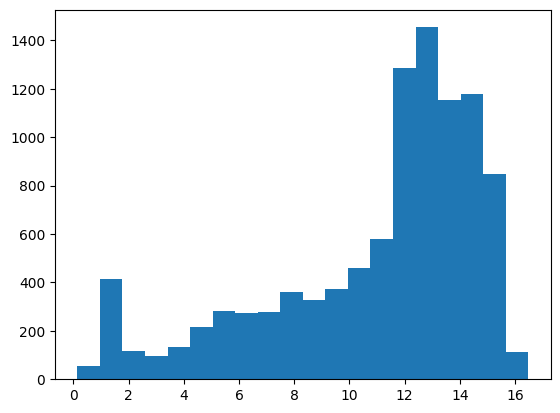

In [130]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt


np.random.seed(42)

# 定义出现频次及其对应的概率
values = [0] + list(range(1, 13)) + [13, 14]
probabilities = [0.05] + [0.02] * 12 + [0.31, 0.40]

# 确保概率总和为1
assert sum(probabilities) == 1.0, "Probabilities must sum to 1."

# 模拟用户出现频次的函数
def simulate_user_frequencies(num_users):
    return np.random.choice(values, size=num_users, p=probabilities)

# 示例：模拟10000个用户的出现频次
num_users = 10000
x = simulate_user_frequencies(num_users)
x2 = simulate_user_frequencies(num_users)
data_1 = pd.DataFrame()
data_1['x1'] = x
data_1['x2'] = x2
data_1[['x3', 'x4','noise']] = np.random.normal(loc=5.0, scale=1.0, size=(10000, 3))
data_1['y'] = 0.4*(data_1['x1']) + np.sqrt(data_1['x1'] * np.abs(data_1['x2']))/2 -  np.sqrt(np.abs(data_1['x4'])*np.abs(data_1['x3']))/20 + 1.5* np.sin(math.pi * data_1['x1'] * data_1['x4']) + np.abs(data_1['noise'])/3
data_1['enter_date'] = 1
plt.hist(data_1['y'],bins = 20)
min(data['y'])


In [116]:
cuped(data_1,'x1','y')
key = ['x1','x2','x3','x4']
post = 'y'
test = data_1.sample(frac=0.2, random_state=0)
train = data_1.drop(test.index)
train,test = itr_xgb(train,test,key,post)

cuped降方差比例： 0.7302573561835997
build data
train test split
model fitting
[0]	validation_0-rmse:8.19347
[1]	validation_0-rmse:8.04224
[2]	validation_0-rmse:7.88964
[3]	validation_0-rmse:7.73351
[4]	validation_0-rmse:7.57477
[5]	validation_0-rmse:7.41618
[6]	validation_0-rmse:7.25530


[7]	validation_0-rmse:7.09147
[8]	validation_0-rmse:6.92893
[9]	validation_0-rmse:6.76313
[10]	validation_0-rmse:6.59676
[11]	validation_0-rmse:6.43178
[12]	validation_0-rmse:6.26429
[13]	validation_0-rmse:6.09696
[14]	validation_0-rmse:5.93006
[15]	validation_0-rmse:5.76783
[16]	validation_0-rmse:5.60722
[17]	validation_0-rmse:5.45549
[18]	validation_0-rmse:5.29309
[19]	validation_0-rmse:5.13264
[20]	validation_0-rmse:4.97445
[21]	validation_0-rmse:4.81837
[22]	validation_0-rmse:4.66915
[23]	validation_0-rmse:4.53141
[24]	validation_0-rmse:4.39672
[25]	validation_0-rmse:4.25094
[26]	validation_0-rmse:4.12319
[27]	validation_0-rmse:3.98393
[28]	validation_0-rmse:3.86144
[29]	validation_0-rmse:3.73364
[30]	validation_0-rmse:3.60396
[31]	validation_0-rmse:3.49189
[32]	validation_0-rmse:3.36908
[33]	validation_0-rmse:3.25546
[34]	validation_0-rmse:3.14069
[35]	validation_0-rmse:3.02919
[36]	validation_0-rmse:2.92202
[37]	validation_0-rmse:2.81865
[38]	validation_0-rmse:2.71831
[39]	valida

0.07365977287352088

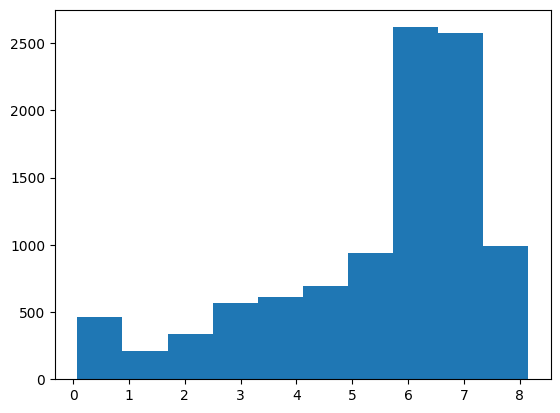

In [117]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt


np.random.seed(42)

# 定义出现频次及其对应的概率
values = [0] + list(range(1, 13)) + [13, 14]
probabilities = [0.05] + [0.02] * 12 + [0.31, 0.40]

# 确保概率总和为1
assert sum(probabilities) == 1.0, "Probabilities must sum to 1."

# 模拟用户出现频次的函数
def simulate_user_frequencies(num_users):
    return np.random.choice(values, size=num_users, p=probabilities)

# 示例：模拟10000个用户的出现频次
num_users = 10000
x = simulate_user_frequencies(num_users)
x2 = simulate_user_frequencies(num_users)
data_2 = pd.DataFrame()
data_2['x1'] = x
data_2['x2'] = x2
data_2[['x3', 'x4','noise']] = np.random.normal(loc=5.0, scale=1.0, size=(10000, 3))
data_2['y'] = 0.2*(data_2['x1']) + np.sqrt(data_2['x1'] * np.abs(data_2['x2']))/4 -  np.sqrt(np.abs(data_2['x4'])*np.abs(data_2['x3']))/40 + np.sin(math.pi * data_2['x1'] * data_2['x4'])/1.5 + np.abs(data_2['noise'])/6
data_2['enter_date'] = 0
plt.hist(data_2['y'])
min(data['y'])


In [118]:
cuped(data_2,'x1','y')
key = ['x1','x2','x3','x4']
post = 'y'
test = data_2.sample(frac=0.2, random_state=0)
train = data_2.drop(test.index)
train,test = itr_xgb(train,test,key,post)

cuped降方差比例： 0.7416234317626421
build data
train test split
model fitting
[0]	validation_0-rmse:3.04531
[1]	validation_0-rmse:2.95669
[2]	validation_0-rmse:2.87220
[3]	validation_0-rmse:2.78664


[4]	validation_0-rmse:2.70237
[5]	validation_0-rmse:2.62274
[6]	validation_0-rmse:2.54414
[7]	validation_0-rmse:2.46395
[8]	validation_0-rmse:2.38914
[9]	validation_0-rmse:2.31188
[10]	validation_0-rmse:2.23652
[11]	validation_0-rmse:2.16561
[12]	validation_0-rmse:2.09273
[13]	validation_0-rmse:2.02155
[14]	validation_0-rmse:1.95211
[15]	validation_0-rmse:1.88874
[16]	validation_0-rmse:1.82727
[17]	validation_0-rmse:1.77288
[18]	validation_0-rmse:1.70956
[19]	validation_0-rmse:1.64856
[20]	validation_0-rmse:1.58967
[21]	validation_0-rmse:1.53254
[22]	validation_0-rmse:1.48126
[23]	validation_0-rmse:1.43684
[24]	validation_0-rmse:1.39405
[25]	validation_0-rmse:1.34366
[26]	validation_0-rmse:1.30458
[27]	validation_0-rmse:1.25765
[28]	validation_0-rmse:1.22104
[29]	validation_0-rmse:1.18106
[30]	validation_0-rmse:1.13931
[31]	validation_0-rmse:1.10730
[32]	validation_0-rmse:1.06855
[33]	validation_0-rmse:1.03481
[34]	validation_0-rmse:0.99948
[35]	validation_0-rmse:0.96576
[36]	validatio

In [119]:
data = pd.concat([data_1,data_2])
cuped(data,'x1','y')
key = ['x1','x2','x3','x4']
post = 'y'
test = data.sample(frac=0.2, random_state=0)
train = data.drop(test.index)
train,test = itr_xgb(train,test,key,post)

cuped降方差比例： 0.3607682292064781
build data
train test split
model fitting
[0]	validation_0-rmse:6.21223
[1]	validation_0-rmse:6.10197
[2]	validation_0-rmse:5.99363
[3]	validation_0-rmse:5.88444
[4]	validation_0-rmse:5.77571
[5]	validation_0-rmse:5.66885
[6]	validation_0-rmse:5.56301
[7]	validation_0-rmse:5.45508
[8]	validation_0-rmse:5.35132
[9]	validation_0-rmse:5.24610
[10]	validation_0-rmse:5.14296
[11]	validation_0-rmse:5.04484
[12]	validation_0-rmse:4.94485
[13]	validation_0-rmse:4.84759
[14]	validation_0-rmse:4.75234
[15]	validation_0-rmse:4.66309
[16]	validation_0-rmse:4.57636
[17]	validation_0-rmse:4.49834
[18]	validation_0-rmse:4.41202
[19]	validation_0-rmse:4.33006
[20]	validation_0-rmse:4.24910
[21]	validation_0-rmse:4.17276
[22]	validation_0-rmse:4.10301
[23]	validation_0-rmse:4.04071
[24]	validation_0-rmse:3.98203
[25]	validation_0-rmse:3.91706
[26]	validation_0-rmse:3.86396
[27]	validation_0-rmse:3.80562
[28]	validation_0-rmse:3.75777
[29]	validation_0-rmse:3.70767
[30]	va

In [123]:
def multi_cuped(data,X,Y,enter_days):
    mean_Y = data[Y].mean()
    mean_x1 = data[X].mean()
    mean_x2 = data[enter_days].mean()

    # Calculate covariances
    cov_Y_x1 = ((data[Y] - mean_Y) * (data[X] - mean_x1)).mean()
    cov_Y_x2 = ((data[Y] - mean_Y) * (data[enter_days] - mean_x2)).mean()
    cov_x1_x2 = ((data[X] - mean_x1) * (data[enter_days] - mean_x2)).mean()

    # Calculate variances
    var_x1 = ((data[X] - mean_x1)**2).mean()
    var_x2 = ((data[enter_days] - mean_x2)**2).mean()

    # Calculate beta coefficients
    theta_1 = (cov_Y_x1 * var_x2 - cov_x1_x2 * cov_Y_x2) / (var_x1 * var_x2 - cov_x1_x2**2)
    theta_2 = (cov_Y_x2 * var_x1 - cov_x1_x2 * cov_Y_x1) / (var_x1 * var_x2 - cov_x1_x2**2)

    data['multi_cuped'] = data[Y] - theta_1*data[X] - theta_2*data[enter_days]
    var_ori = np.var(data[post])
    var_cuped = np.var(data['multi_cuped'])
    print('cuped降方差比例：',1-var_cuped/var_ori)
    
    return theta_1,theta_2

In [124]:
multi_cuped(data,'x1','y','enter_date')
key = ['x1','x2','x3','x4','enter_date']
post = 'y'
test = data.sample(frac=0.2, random_state=0)
train = data.drop(test.index)
train,test = itr_xgb(train,test,key,post)

cuped降方差比例： 0.813535523235394
build data
train test split
model fitting
[0]	validation_0-rmse:6.20592


[1]	validation_0-rmse:6.08862
[2]	validation_0-rmse:5.97768
[3]	validation_0-rmse:5.86975
[4]	validation_0-rmse:5.74910
[5]	validation_0-rmse:5.62719
[6]	validation_0-rmse:5.51507
[7]	validation_0-rmse:5.40300
[8]	validation_0-rmse:5.29059
[9]	validation_0-rmse:5.16790
[10]	validation_0-rmse:5.05508
[11]	validation_0-rmse:4.94234
[12]	validation_0-rmse:4.81767
[13]	validation_0-rmse:4.69462
[14]	validation_0-rmse:4.58600
[15]	validation_0-rmse:4.47493
[16]	validation_0-rmse:4.35215
[17]	validation_0-rmse:4.24792
[18]	validation_0-rmse:4.14496
[19]	validation_0-rmse:4.02808
[20]	validation_0-rmse:3.91215
[21]	validation_0-rmse:3.80768
[22]	validation_0-rmse:3.69532
[23]	validation_0-rmse:3.58180
[24]	validation_0-rmse:3.47344
[25]	validation_0-rmse:3.36693
[26]	validation_0-rmse:3.25977
[27]	validation_0-rmse:3.15756
[28]	validation_0-rmse:3.07436
[29]	validation_0-rmse:2.98446
[30]	validation_0-rmse:2.88631
[31]	validation_0-rmse:2.80997
[32]	validation_0-rmse:2.71638
[33]	validation_0

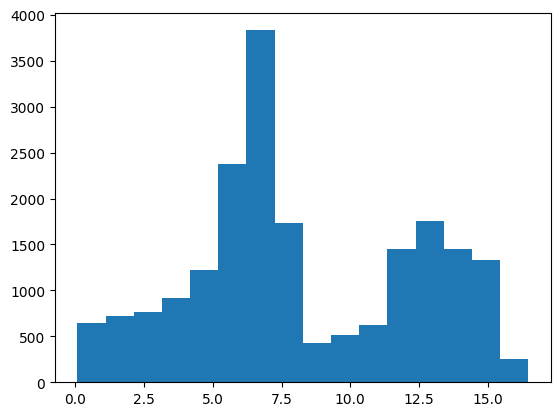

In [125]:
plt.hist(data['y'],bins = 16)
plt.show()

(array([ 711.,  210.,  430.,  208.,  195.,  411.,  230.,  417.,  203.,
        6985.]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <BarContainer object of 10 artists>)

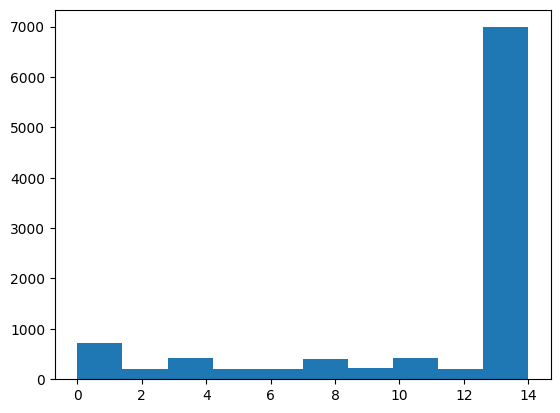

In [150]:
import random
import pandas as pd

def generate_first_feature():
    rand = random.uniform(0, 100)
    
    if rand < 70:
        # 出现13或14
        return random.choice([13, 14])
    elif rand>95:
            return 0
    else:
        # 出现0至12
        return random.randint(1, 12)

def generate_second_feature(first_feature):
    if first_feature in [13, 14]:
        rand = random.uniform(0, 100)
        if rand < 90:
            # 与第一组特征相同
            return first_feature
        else:
            # 出现0至12
            return random.randint(0, 12)
    else:
        rand = random.uniform(0, 100)
        if rand < 50:
            # 与第一组特征相同
            return first_feature
        else:
            # 出现0至第一组特征的值
            return random.randint(0, first_feature)

# 创建一个列表来存储用户特征数据
data_list = []

# 假设我们要生成10个用户的数据
for _ in range(10000):
    first_feature = generate_first_feature()
    second_feature = generate_second_feature(first_feature)
    data_list.append({'enter_date': first_feature, 'x1': second_feature})
data_2 = pd.DataFrame(data_list)

data_2[['x3', 'x4','noise']] = np.random.normal(loc=5.0, scale=1.0, size=(10000, 3))
data_2['y'] = 0.4*(data_2['x1']) + np.sqrt(data_2['x1'] * np.abs(data_2['enter_date']))/2 -  np.sqrt(np.abs(data_2['x4'])*np.abs(data_2['x3']))/20 + 1.5* np.sin(math.pi * data_2['x1'] * data_2['x4']) + np.abs(data_2['noise'])/3
# data_2['enter_date'] = 0
plt.hist(data_2['enter_date'])

In [149]:
cuped(data_2,'x1','y')
key = ['x1','x3','x4']
post = 'y'
test = data_2.sample(frac=0.2, random_state=0)
train = data_2.drop(test.index)
train,test = itr_xgb(train,test,key,post)

cuped降方差比例： 0.9376698662965788
build data
train test split
model fitting
[0]	validation_0-rmse:8.28830
[1]	validation_0-rmse:8.13905
[2]	validation_0-rmse:7.98708


[3]	validation_0-rmse:7.85278
[4]	validation_0-rmse:7.71762
[5]	validation_0-rmse:7.55777
[6]	validation_0-rmse:7.39592
[7]	validation_0-rmse:7.23279
[8]	validation_0-rmse:7.09380
[9]	validation_0-rmse:6.95532
[10]	validation_0-rmse:6.78786
[11]	validation_0-rmse:6.64955
[12]	validation_0-rmse:6.51075
[13]	validation_0-rmse:6.37557
[14]	validation_0-rmse:6.20604
[15]	validation_0-rmse:6.03718
[16]	validation_0-rmse:5.90395
[17]	validation_0-rmse:5.73590
[18]	validation_0-rmse:5.56911
[19]	validation_0-rmse:5.43883
[20]	validation_0-rmse:5.27492
[21]	validation_0-rmse:5.11286
[22]	validation_0-rmse:4.95362
[23]	validation_0-rmse:4.83358
[24]	validation_0-rmse:4.71516
[25]	validation_0-rmse:4.56150
[26]	validation_0-rmse:4.41061
[27]	validation_0-rmse:4.26371
[28]	validation_0-rmse:4.11968
[29]	validation_0-rmse:3.97956
[30]	validation_0-rmse:3.84295
[31]	validation_0-rmse:3.74450
[32]	validation_0-rmse:3.61366
[33]	validation_0-rmse:3.52323
[34]	validation_0-rmse:3.43476
[35]	validation